System Security Week 4
======================

Exercise 2
----------

In order to "help" decrypt the encrypted file, the code in encrypt.py is inspected. Here it is noticed that the encryption has been done with a random key using the time as the seed for the PRNG. Since it is given that the file was encrypted last friday, and time.time() returns the unix epoch time stamp in seconds, the integer cast means that there are only $24 \cdot 60 \cdot 60 = 86400$ possible seeds. Since random will return the same number on it's first call for a given seed, it should be relatively easy to brute force the key:

In [44]:
from datetime import datetime
import random
seed_start = int(datetime(2021, 9, 20).timestamp()) # date of last monday
seed_count = 24*60*60
#seed_start -= seed_count
#seed_count *= 3
keys = []
for i in range(seed_count):
    random.seed(seed_start+i)
    keys.append(random.randbytes(16))

The second thing needed in order to perform this brute force attack is a means of detecting when the file has been successfully decrypted. Since this is encrypted using GCM mode, the tag verification provides a nice mechanism for this. 
The decryption keys are then tried in succession until a successful decryption is achieved:

In [48]:
from Crypto.Cipher import AES
with open('ciphertext.bin', 'rb') as f_in:
        data = f_in.read()
        nonce = data[:16]
        tag = data[16:32]
        ciphertext = data[32:]

plaintext = None
for key in keys:
    cipher = AES.new(key, AES.MODE_GCM, nonce=nonce)
    try:
        plaintext = cipher.decrypt_and_verify(ciphertext, tag)
    except ValueError:
        continue
    print("file decrypted and saved as plain.txt")
    print(f"the key was: {key}")
    with open('plain.txt', 'wb') as f_out:
        f_out.write(plaintext)
    break

if not plaintext:
    print("The file could not be decrypted")

file decrypted and saved as plain.txt
the key was: b'\xa0jJ^\xd5\xd2\xd1\xaegd\x98\xa5R\xa2\xea\xda'


And the plain text turned out to be a nice little xkcd reference:  
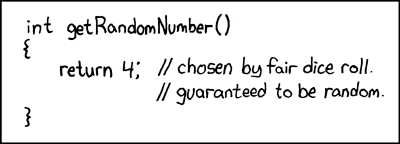

/home/student/courses/e21-syssec/au-syssec-e21-exercises/03_weak_entropy_and_authentication_mechanisms
